# Import library

In [2]:
#Import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,accuracy_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV
seed =45
% matplotlib inline

# Import data set

In [3]:
#path = '../input/'
path = ''
train = pd.read_csv(path+'train.csv',na_values=-1)
test = pd.read_csv(path+'test.csv',na_values=-1)
print('Number rows and columns:',train.shape)
print('Number rows and columns:',test.shape)

Number rows and columns: (595212, 59)
Number rows and columns: (892816, 58)


# Explore data set

In [4]:
train.head(3).T

,0,1,2
id,7.000000,9.000000,13.000000
target,0.000000,0.000000,0.000000
ps_ind_01,2.000000,1.000000,5.000000
ps_ind_02_cat,2.000000,1.000000,4.000000
ps_ind_03,5.000000,7.000000,9.000000
ps_ind_04_cat,1.000000,0.000000,1.000000
ps_ind_05_cat,0.000000,0.000000,0.000000
ps_ind_06_bin,0.000000,0.000000,0.000000
ps_ind_07_bin,1.000000,0.000000,0.000000
ps_ind_08_bin,0.000000,1.000000,1.000000


# Target varaiable

0    573518
1     21694
Name: target, dtype: int64

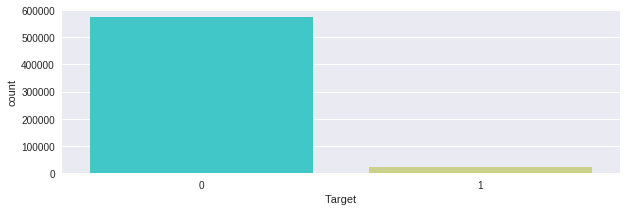

In [3]:
plt.figure(figsize=(10,3))
sns.countplot(train['target'],palette='rainbow')
plt.xlabel('Target')

train['target'].value_counts()

The 'target' variable in imbalanced 

# CORELATION PLOT

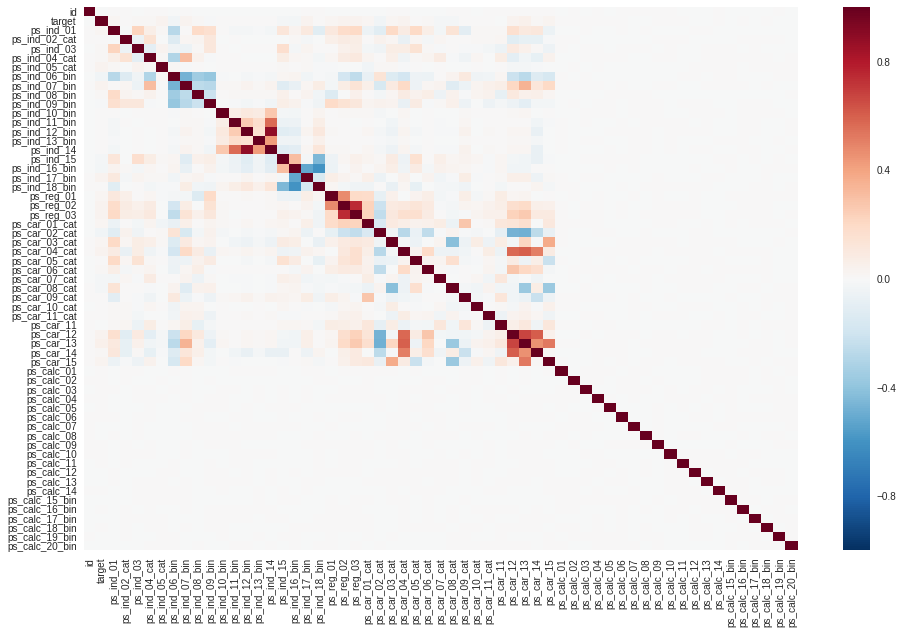

In [4]:
cor = train.corr()
plt.figure(figsize=(16,10))
sns.heatmap(cor)

#  ps calc  *  value as 0 relation with remaining varialble

In [4]:
ps_cal = train.columns[train.columns.str.startswith('ps_calc')] 
train = train.drop(ps_cal,axis =1)
test = test.drop(ps_cal,axis=1)
train.shape

(595212, 39)

# Missing value is data set

"""Values of -1 indicate that the feature was missing from the observation. 
The target columns signifies whether or not a claim was filed for that policy holder.""

In [71]:
k= pd.DataFrame()
k['train']= train.isnull().sum()
k['test'] = test.isnull().sum()
k

,train,test
id,0,0.0
target,0,NaN
ps_ind_01,0,0.0
ps_ind_02_cat,216,307.0
ps_ind_03,0,0.0
ps_ind_04_cat,83,145.0
ps_ind_05_cat,5809,8710.0
ps_ind_06_bin,0,0.0
ps_ind_07_bin,0,0.0
ps_ind_08_bin,0,0.0


Missing value in test train data set are in same propotion and same column

In [5]:
def missing_value(df):
    col = df.columns
    for i in col:
        if df[i].isnull().sum()>0:
            df[i].fillna(df[i].mode()[0],inplace=True)

In [6]:
missing_value(train)
missing_value(test)

In [8]:
def uniq(df):
    col = df.columns
    for i in col:
        print('\n Unique value of "{}" is "{}" '.format(i,df[i].nunique()))
        #print(df[i].unique())
uniq(train)


 Unique value of "id" is "595212" 

 Unique value of "target" is "2" 

 Unique value of "ps_ind_01" is "8" 

 Unique value of "ps_ind_02_cat" is "4" 

 Unique value of "ps_ind_03" is "12" 

 Unique value of "ps_ind_04_cat" is "2" 

 Unique value of "ps_ind_05_cat" is "7" 

 Unique value of "ps_ind_06_bin" is "2" 

 Unique value of "ps_ind_07_bin" is "2" 

 Unique value of "ps_ind_08_bin" is "2" 

 Unique value of "ps_ind_09_bin" is "2" 

 Unique value of "ps_ind_10_bin" is "2" 

 Unique value of "ps_ind_11_bin" is "2" 

 Unique value of "ps_ind_12_bin" is "2" 

 Unique value of "ps_ind_13_bin" is "2" 

 Unique value of "ps_ind_14" is "5" 

 Unique value of "ps_ind_15" is "14" 

 Unique value of "ps_ind_16_bin" is "2" 

 Unique value of "ps_ind_17_bin" is "2" 

 Unique value of "ps_ind_18_bin" is "2" 

 Unique value of "ps_reg_01" is "10" 

 Unique value of "ps_reg_02" is "19" 

 Unique value of "ps_reg_03" is "5012" 

 Unique value of "ps_car_01_cat" is "12" 

 Unique value of "ps_car

###### The unique value of "ps_car_11_cat" is maximum in the data set is 104

In [7]:
def category_type(df):
    col = df.columns
    for i in col:
        if df[i].nunique()<=104:
            df[i] = df[i].astype('category')
category_type(train)
category_type(test)

# Univariate analysis

In [8]:
cat_col = [col for col in train.columns if '_cat' in col]
print(cat_col)

['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']


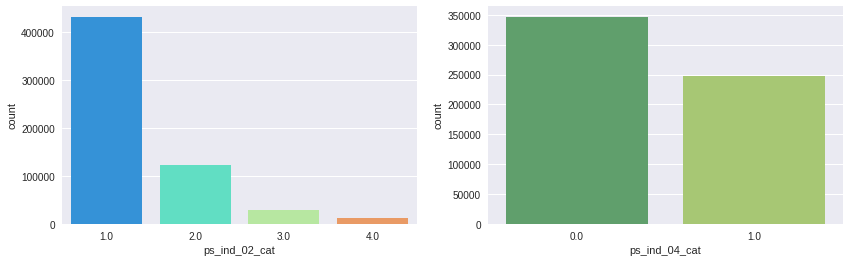

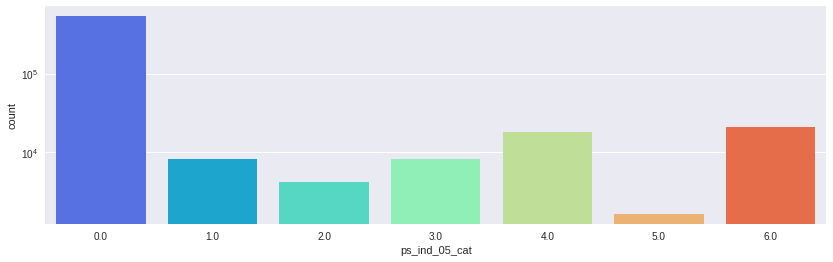

In [11]:
fig ,ax = plt.subplots(1,2,figsize=(14,4))
ax1,ax2, = ax.flatten()
sns.countplot(train['ps_ind_02_cat'],palette='rainbow',ax=ax1)
sns.countplot(train['ps_ind_04_cat'],palette='summer',ax=ax2)
fig,ax = plt.subplots(figsize=(14,4))
sns.countplot(train['ps_ind_05_cat'],palette='rainbow',ax=ax)
ax.set_yscale('log')

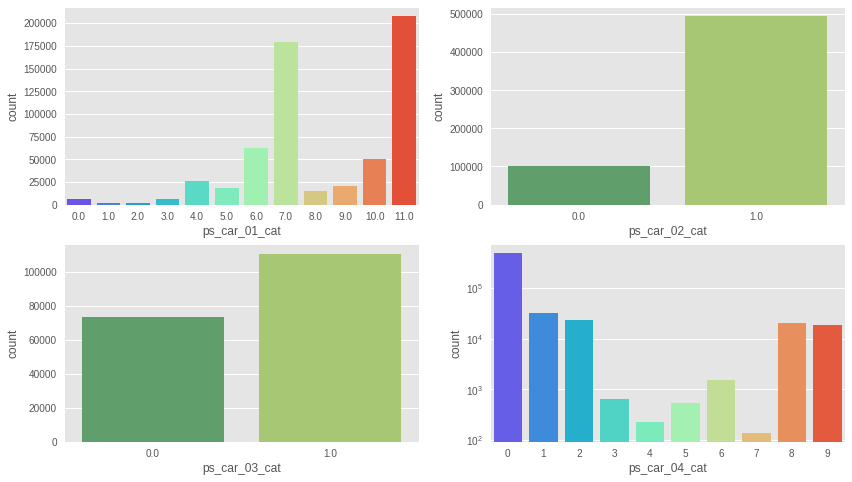

In [192]:
fig,ax = plt.subplots(2,2,figsize=(14,8))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.countplot(train['ps_car_01_cat'],palette='rainbow',ax=ax1)
sns.countplot(train['ps_car_02_cat'],palette='summer',ax=ax2)
sns.countplot(train['ps_car_03_cat'],palette='summer',ax=ax3)
sns.countplot(train['ps_car_04_cat'],palette='rainbow',ax=ax4)
ax4.set_yscale('log')

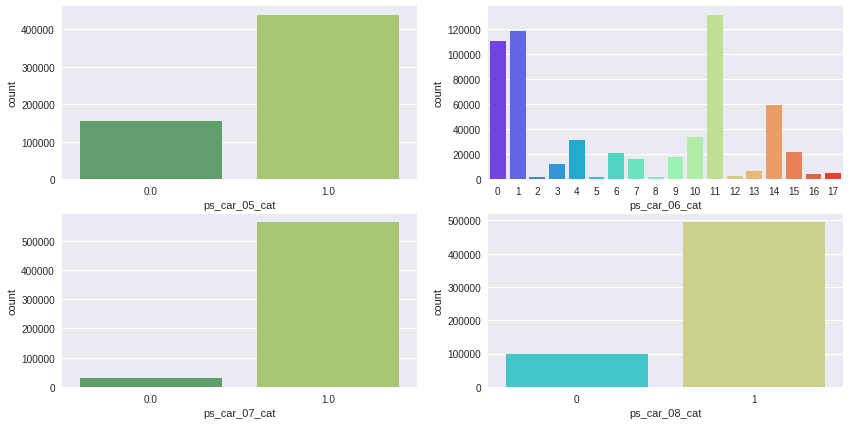

In [21]:
fig,ax = plt.subplots(2,2,figsize = (14,7))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.countplot(train['ps_car_05_cat'],palette='summer',ax=ax1)
sns.countplot(train['ps_car_06_cat'],palette='rainbow',ax=ax2)
sns.countplot(train['ps_car_07_cat'],palette='summer',ax=ax3)
sns.countplot(train['ps_car_08_cat'],palette='rainbow',ax=ax4)


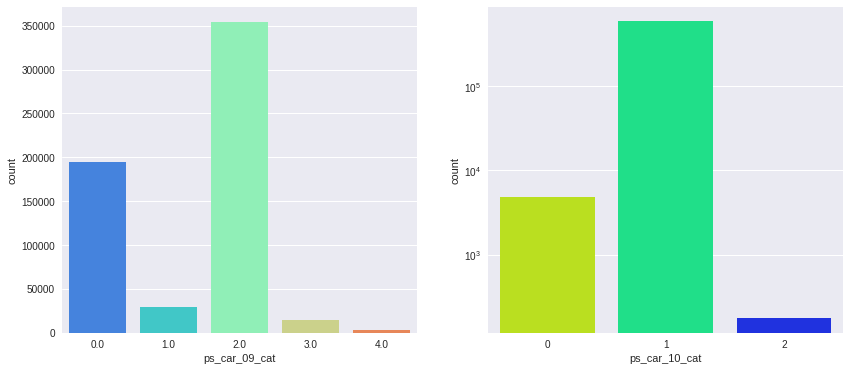

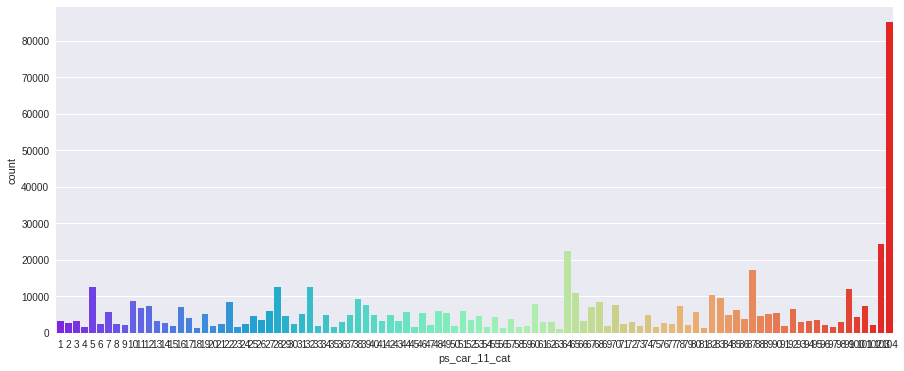

In [102]:
fig, ax = plt.subplots(1,2,figsize=(14,6))
ax1,ax2 = ax.flatten()
sns.countplot(train['ps_car_09_cat'],palette='rainbow',ax=ax1)
sns.countplot(train['ps_car_10_cat'],palette='gist_rainbow',ax=ax2)
ax2.set_yscale('log')
fig,ax = plt.subplots(figsize=(15,6))
sns.countplot(train['ps_car_11_cat'],palette='rainbow',ax=ax)

In [9]:
bin_col = [col for col in train.columns if 'bin' in col]
print(bin_col)

['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin']


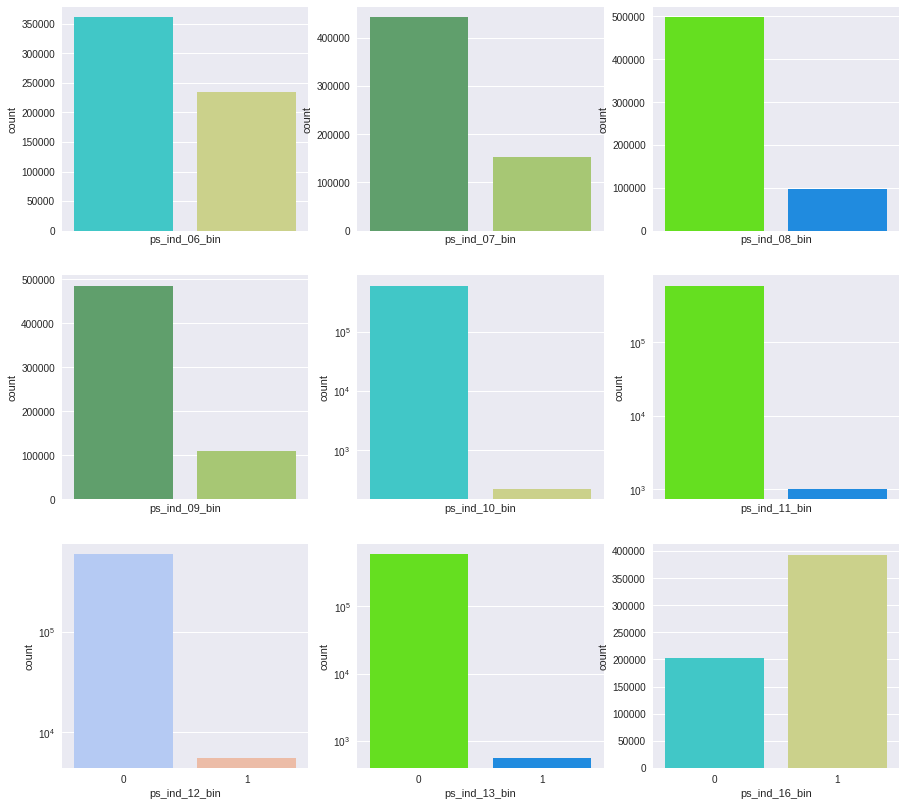

In [100]:
fig,ax = plt.subplots(3,3,figsize=(15,14),sharex='all')
ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9 = ax.flatten()
sns.countplot(train['ps_ind_06_bin'],palette='rainbow',ax=ax1)
sns.countplot(train['ps_ind_07_bin'],palette='summer',ax=ax2)
sns.countplot(train['ps_ind_08_bin'],palette='gist_rainbow',ax=ax3)
sns.countplot(train['ps_ind_09_bin'],palette='summer',ax=ax4)
sns.countplot(train['ps_ind_10_bin'],palette='rainbow',ax=ax5)
ax5.set_yscale('log')
sns.countplot(train['ps_ind_11_bin'],palette='gist_rainbow',ax=ax6)
ax6.set_yscale('log')
sns.countplot(train['ps_ind_12_bin'],palette='coolwarm',ax=ax7)
ax7.set_yscale('log')
sns.countplot(train['ps_ind_13_bin'],palette='gist_rainbow',ax=ax8)
ax8.set_yscale('log')
sns.countplot(train['ps_ind_16_bin'],palette='rainbow',ax=ax9)

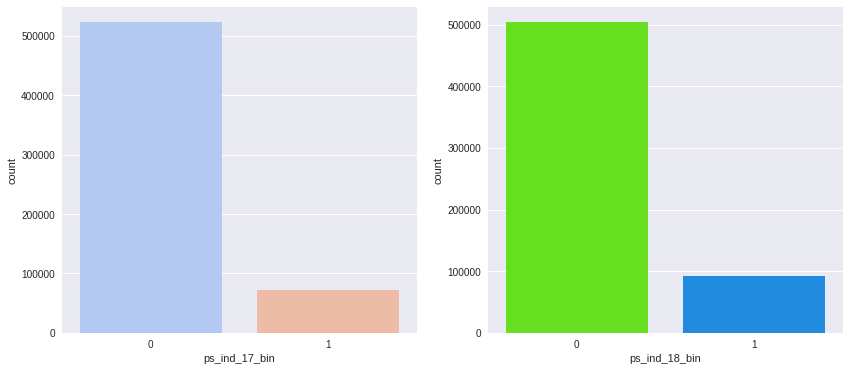

In [99]:
fig,ax = plt.subplots(1,2,figsize=(14,6))
ax1,ax2 = ax.flatten()
sns.countplot(train['ps_ind_17_bin'],palette='coolwarm',ax=ax1)
sns.countplot(train['ps_ind_18_bin'],palette='gist_rainbow',ax=ax2)

In [10]:
tot_cat_col = list(train.select_dtypes(include=['category']).columns)

other_cat_col = [c for c in tot_cat_col if c not in cat_col+ bin_col]
other_cat_col

['target',
 'ps_ind_01',
 'ps_ind_03',
 'ps_ind_14',
 'ps_ind_15',
 'ps_reg_01',
 'ps_reg_02',
 'ps_car_11',
 'ps_car_15']

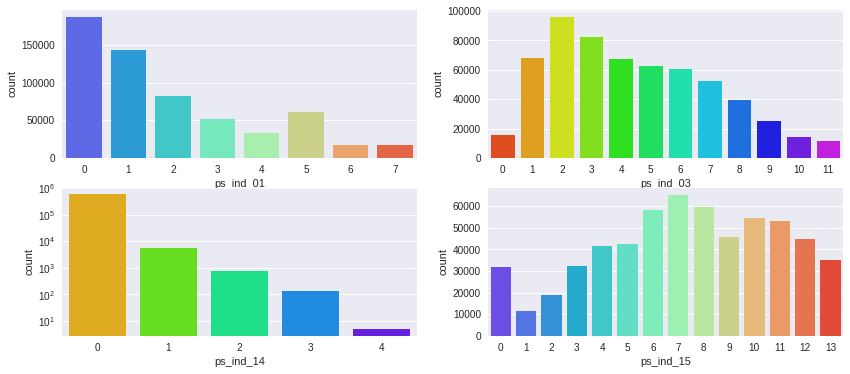

In [97]:
fig,ax = plt.subplots(2,2,figsize=(14,6))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.countplot(data=train,x='ps_ind_01',palette='rainbow',ax=ax1)
sns.countplot(data=train,x='ps_ind_03',palette='gist_rainbow',ax=ax2)
sns.countplot(data=train,x='ps_ind_14',palette='gist_rainbow',ax=ax3)
ax3.set_yscale('log')
sns.countplot(data=train,x='ps_ind_15',palette='rainbow',ax=ax4)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

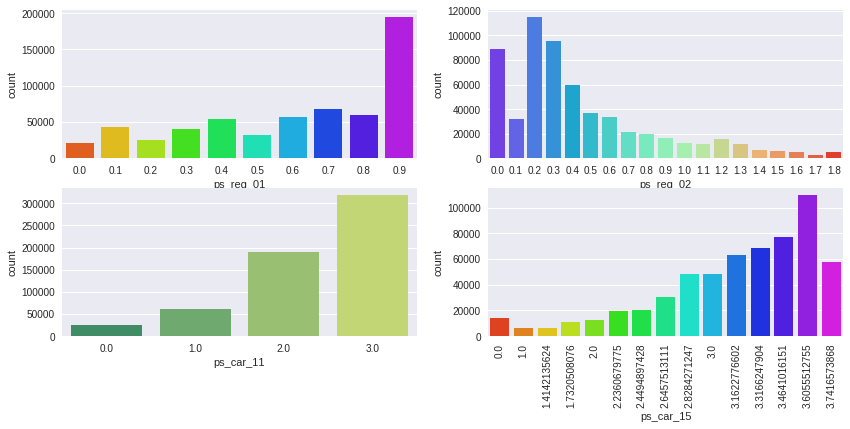

In [114]:
fig,ax = plt.subplots(2,2,figsize=(14,6))
ax1,ax2,ax3,ax4 =ax.flatten()
sns.countplot(data=train,x='ps_reg_01',palette='gist_rainbow',ax=ax1)
sns.countplot(data=train,x='ps_reg_02',palette='rainbow',ax=ax2)
sns.countplot(data=train,x='ps_car_11',palette='summer',ax=ax3)
sns.countplot(data=train,x='ps_car_15',palette='gist_rainbow',ax=ax4)
plt.xticks(rotation=90)

In [11]:
num_col = [c for c in train.columns if c not in tot_cat_col]
num_col.append('ps_car_15')
train['ps_car_15'] = train['ps_car_15'].astype('float32')
test['ps_car_15'] = test['ps_car_15'].astype('float32')
num_col.remove('id')
num_col

['ps_reg_03', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15']

In [12]:
train['ps_reg_03'].describe()

count    595212.000000
mean          0.846950
std           0.328237
min           0.061237
25%           0.633936
50%           0.720677
75%           1.000000
max           4.037945
Name: ps_reg_03, dtype: float64

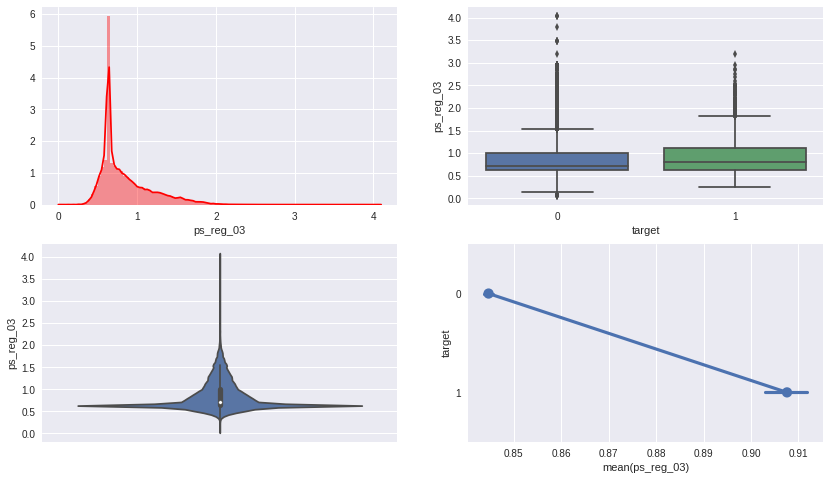

In [17]:
fig,ax = plt.subplots(2,2,figsize=(14,8))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.distplot(train['ps_reg_03'],bins=100,color='red',ax=ax1)
sns.boxplot(x ='ps_reg_03',y='target',data=train,ax=ax2)
sns.violinplot(x ='ps_reg_03',y='target',data=train,ax=ax3)
sns.pointplot(x= 'ps_reg_03',y='target',data=train,ax=ax4)

ps_reg_03 has outlier data points

In [16]:
train['ps_car_12'].describe()

count    595212.000000
mean          0.379947
std           0.058300
min           0.100000
25%           0.316228
50%           0.374166
75%           0.400000
max           1.264911
Name: ps_car_12, dtype: float64

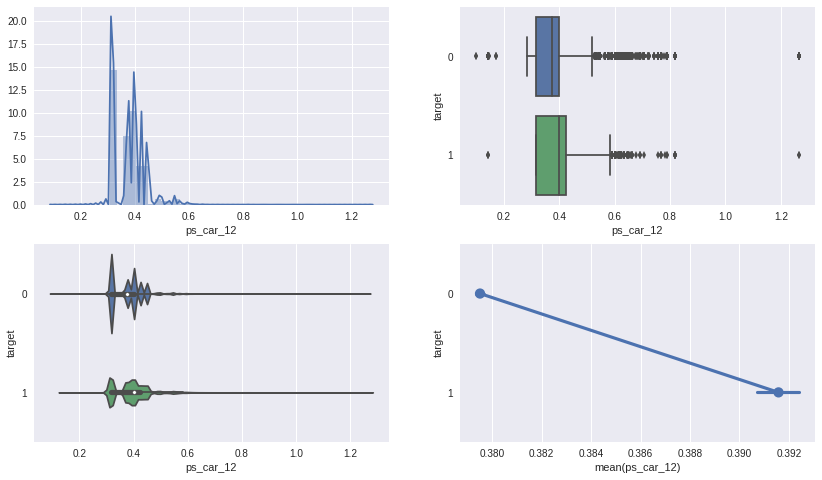

In [35]:
fig,ax = plt.subplots(2,2,figsize=(14,8))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.distplot(train['ps_car_12'],bins=50,ax=ax1)
sns.boxplot(x='ps_car_12',y='target',data=train,ax=ax2)
sns.violinplot(x='ps_car_12',y='target',data=train,ax=ax3)
sns.pointplot(x='ps_car_12',y='target',data=train,ax=ax4)

In [31]:
train['ps_car_13'].describe()

count    595212.000000
mean          0.813265
std           0.224588
min           0.250619
25%           0.670867
50%           0.765811
75%           0.906190
max           3.720626
Name: ps_car_13, dtype: float64

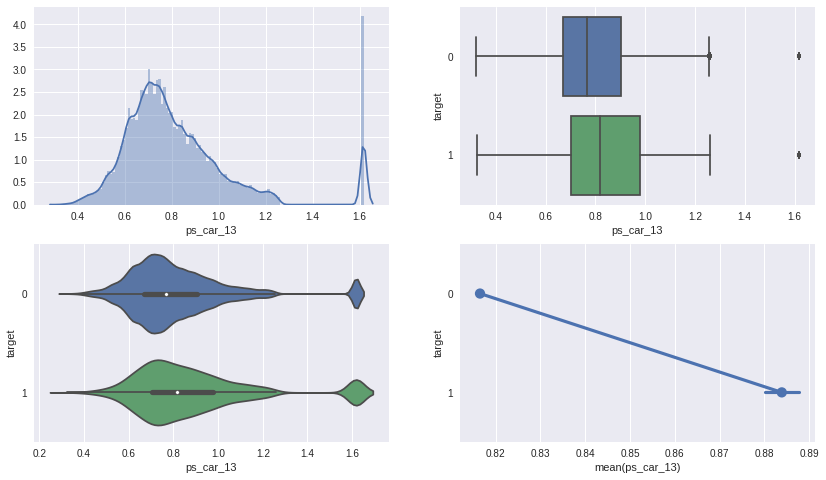

In [58]:
fig,ax = plt.subplots(2,2,figsize=(14,8))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.distplot(train['ps_car_13'],bins=120,ax=ax1)
sns.boxplot(x='ps_car_13',y='target',data=train,ax=ax2)
sns.violinplot(x='ps_car_13',y='target',data=train,ax=ax3)
sns.pointplot(x='ps_car_13',y='target',data=train,ax=ax4)

In [37]:
train['ps_car_14'].describe()

count    595212.000000
mean          0.373748
std           0.044078
min           0.109545
25%           0.353553
50%           0.368782
75%           0.396485
max           0.636396
Name: ps_car_14, dtype: float64

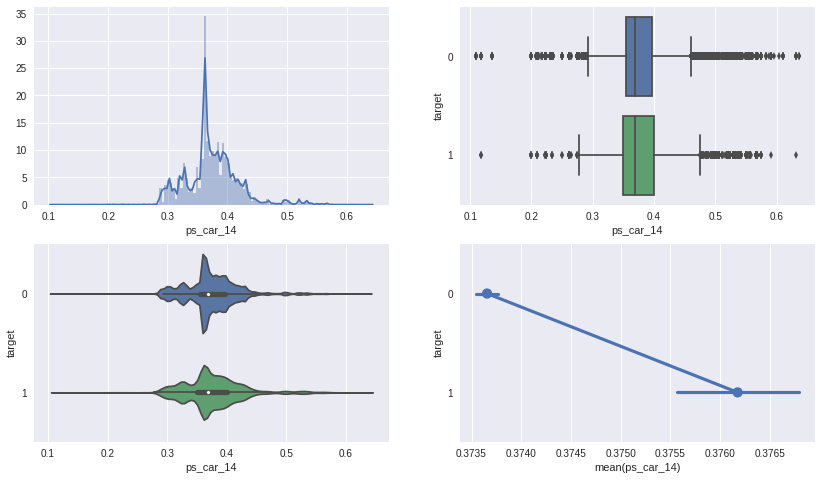

In [47]:
fig,ax = plt.subplots(2,2,figsize=(14,8))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.distplot(train['ps_car_14'],bins=120,ax=ax1)
sns.boxplot(x='ps_car_14',y='target',data=train,ax=ax2)
sns.violinplot(x='ps_car_14',y='target',data=train,ax=ax3)
sns.pointplot(x='ps_car_14',y='target',data=train,ax=ax4)

# Co relation plot

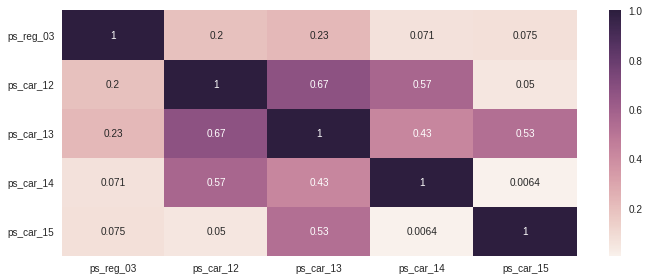

In [56]:
cor = train[num_col].corr()
plt.figure(figsize=(10,4))
sns.heatmap(cor,annot=True)
plt.tight_layout()

In [13]:
#Final categorical columns to be consider
tot_cat_col.remove('ps_car_15')
tot_cat_col.remove('target')
train['ps_car_15'] = train['ps_car_15'].astype('float32')

# Determine outliers in dataset

In [14]:
def outlier(df,columns):
    for i in columns:
        quartile_1,quartile_3 = np.percentile(df[i],[25,75])
        quartile_f,quartile_l = np.percentile(df[i],[1,99])
        IQR = quartile_3-quartile_1
        lower_bound = quartile_1 - (1.5*IQR)
        upper_bound = quartile_3 + (1.5*IQR)
        print(lower_bound,upper_bound)
        print(quartile_f,quartile_l)
        
        df[i].loc[df[i] < lower_bound] = quartile_f
        df[i].loc[df[i] > upper_bound] = quartile_l
        
outlier(train,num_col)

0.08484029175 1.54909582495
0.4183300133 1.8521946442


/home/sudhir/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0.190569415 0.525658351
0.3155946768 0.5656854249
0.31788087655 1.25917611615
0.448300509774 1.61761689551
0.2891566485 0.4608812941
0.2887905816 0.5234500931
1.66274082661 4.77123749256
0.0 3.7416574955


# One Hot Encoding

In [15]:
def OHE(df1,df2,column):
    cat_col = column
    #cat_col = df.select_dtypes(include =['category']).columns
    len_df1 = df1.shape[0]
    
    df = pd.concat([df1,df2],ignore_index=True)
    c2,c3 = [],{}
    
    print('Categorical feature',len(column))
    for c in cat_col:
        if df[c].nunique()>2 :
            c2.append(c)
            c3[c] = 'ohe_'+c
    
    df = pd.get_dummies(df, prefix=c3, columns=c2,drop_first=True)

    df1 = df.loc[:len_df1-1]
    df2 = df.loc[len_df1:]
    print('Train',df1.shape)
    print('Test',df2.shape)
    return df1,df2

In [16]:
train1,test1 = OHE(train,test,tot_cat_col)

Categorical feature 32
(595212, 244)
(892816, 244)


# Split data set

In [17]:
X = train1.drop(['target','id'],axis=1)
y = train1['target'].astype('category')
x_test = test1.drop(['target','id'],axis=1)
del train1,test1

# Model

Logistic regression is used for modelling. The data set is split using Stratified Kfold. In each split model is created and predicted using that model. The final predicted value is average of all model. 

In [20]:
logreg = LogisticRegression(class_weight='balanced')
param = {'C':np.logspace(start=-5,stop=3,num=9)}
clf = GridSearchCV(logreg,param,scoring='roc_auc',refit=True)
clf.fit(X,y)
print('Best roc_auc: {:.4}, with best C: {}'.format(clf.best_score_, clf.best_params_['C']))

KeyboardInterrupt: 

In [17]:
kf = StratifiedKFold(n_splits=2,random_state=seed,shuffle=True)
pred_test_full=0
cv_score=[]
i=1
for train_index,test_index in kf.split(X,y):    
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    
    lr = LogisticRegression(class_weight='balanced',C=0.1)
    lr.fit(xtr, ytr)
    pred_test = lr.predict_proba(xvl)[:,1]
    score = roc_auc_score(yvl,pred_test)
    print('roc_auc_score',score)
    cv_score.append(score)
    pred_test_full += lr.predict_proba(x_test)[:,1]
    i+=1


1 of kfold 2
roc_auc_score 0.609168838639

2 of kfold 2
roc_auc_score 0.605453325261


In [66]:
print('Cv',cv_score,'\nMean cv Score',np.mean(cv_score))

Cv [0.63155057803291248, 0.63387999726818567] 
Mean cv Score 0.632715287651


# Predict for unsen data set

In [18]:
y_pred = pred_test_full/2
submit = pd.DataFrame({'id':test['id'],'target':y_pred})
submit.to_csv('lr_porto.csv.gz',index=False,compression='gzip') 
#submit.to_csv('lr_porto.csv',index=False) 

In [43]:
submit.head()

,id,target
0,0,0.428893
1,1,0.474077
2,2,0.395909
3,3,0.344243
4,4,0.506186


# Thank you for visiting